# Electrostatics
The majority of electrostatics can be summarized with two of Maxwell's equations and the Lorentz force. Gauss's Law relates the electric field to the charge distribution $\rho$ and the permittivity of free space $\epsilon_0$,  
$$\nabla \cdot \vec{E} = \frac{\rho}{\epsilon_0}$$
This equation expresses that electric field lines originate on positive charges and terminate on negative charges.

The electrostatic field $\vec{E}$ lacks a curl,
$$\nabla \times \vec{E} = 0$$
which leads to the fact that electrostatic fields are conservative and can be derived from a scalar potential, $\vec{E} = -\nabla V$.

The interaction of the electric field with charged particles are described by Lorentz force law,
$$\vec{F} = q\vec{E}$$
indicating that a charge $q$ experiences a force in the direction of the field.

Electrostatics primarily deals with stationary charges, leading to time-independent fields. This framework provides the foundation for concepts such as Coulomb’s law, electric potential, and capacitance, all of which play crucial roles in classical electromagnetism and modern electrical applications.


# Electrostatic potentials

The electrostatic potential $V$ is a scalar function that simplifies the description of electric fields. It arises naturally from the conservative natural of the electrostatic forces. We can directly relate the electrostatic potential to the charge distribution using Gauss's Law,
$$\nabla \cdot(-\nabla V) = \frac{\rho}{\epsilon_0}\Rightarrow \nabla^2 V = -\frac{\rho}{\epsilon_0}.$$

The concept of potential is particularly useful in solving electrostatic problems, as it often simplifies boundary-value problems and provides insight into energy storage in electric fields, as seen in capacitors and other electrostatic systems.

Suppose that we are given the electrical potential in the boundaries of some region, and we want to find the potential $V(\mathbf{r})$ inside that region. Once we know $V$ we can use the relation $\mathbf{E}=-\nabla V(\mathbf{r})$ to determine $\mathbf{E}$. This is a “boundary problem”. We know from classical electrodinamics (Gauss’ Law) that the potential $V(x,y,z)$ satisfies Poisson’s equation:

$$\nabla^2V(x,y,z)=-\frac{\rho(x,y,z)}{\epsilon_0}$$ 

where
$$\nabla ^2V = \frac{\partial ^2V}{\partial x^2} +
\frac{\partial ^2V}{\partial y^2} +
\frac{\partial ^2V}{\partial z^2},$$ 
and $\rho$, the charge density inside the region. Besides satisfying Poisson's equation, $V$ must also satisify the boundary conditions. Because the shape of the region can be arbitrary, we often need computational methods to solve the problem. In the particular situation that there are no charges inside
the region, the problem reduces to solving “Laplace’s equation”,
$$\nabla ^2V(x,y,z)=0.$$ 
As we did in the previous examples of PDE’s, we can discretize the derivatives and transform the equation to a finite differences problem. From now on we worry only about the two-dimensional case. We discretize the region in a grid with points $(x,y)$ separated by intervals $(\Delta x, \Delta y)$. The second derivatives are approximated by: 

$$\begin{aligned}
\frac{\partial^2 V(x,y)}{\partial x^2} &\simeq&
\frac{V(x+\Delta x,y)+V(x-\Delta x,y)-2V(x,y)}{(\Delta x)^2}, \\
\frac{\partial^2 V(x,y)}{\partial y^2} &\simeq&
\frac{V(x,y+\Delta y)+V(x,y-\Delta y)-2V(x,y)}{(\Delta y)^2}.
\end{aligned}$$

Replacing these expressions in Laplace's equation and choosing $\Delta x =
\Delta y = \Delta$ (equal step sizes in all directions), we obtain
$$V(x,y) \simeq \frac{1}{4}[V(x+\Delta, y)+V(x-\Delta,y)+V(x,y+\Delta)+V(x,y-\Delta)].$$ 
That is, the value of $V(x,y)$ is given by the **average of the values** in the neighboring nodes in the grid.

## Units

Notice that the charge of the electron is $e=1.6 \times 10^{-19} C$. From a microscopic point of view, the Coulomb is a very large unit of
charge. Hence, we expect that for many simulations, it is advantageous to choose different units.

# The finite differences algorithm

Suppose that we are given the values of $V(x,y)$ in the boundaries of a rectangular area. If we divide the rectangle into a grid, we can the apply the difference method to calculate the values of $V$ inside. However, we notice that if we apply this equation at a point in the middle, we get zero as a result. So the first obvious observation is that the initial estimate for the method can not be a constant value. It is evident now that the procedure has to be iterative. We start from the bottom-left corner, and we sweep across the grid. As we obtain the first estimate for $V$, we repeat the sweep until the values of $V$ do not change considerably, and we can say that we have converged with certain accuracy. Here we have started with the initial values $V(x,y)$ inside the grid that in principle can be any initial guess (exept a constant, as we have seen). The rate of convergence will be determined by the proximity of this guess to the actual solution.

The algorithm can be decribed as follows:

1.  Divide the region of interest into a grid. The region must be enclosed by boundaries with known values of $V$.

2.  Assign all boundary points their values, and all interior cells an arbitrary potential (preferably a reasonable guess)

3.  sweep the internal cells by rows or columns and calculate the new values of $V$ as the average in the four neighboring points.
    
4.  Repeat the sweep using the values obtained in the previous iteration, until the potential does not change within certain level of accuracy.

## The Iterative methods

The method that iterates over a spatial grid can take many forms. There of this forms are
- Jacobi Method: updates each grid point using the average of its four nearest neighbors without modifying values within the same iteration.
- Gauss-Seidel Method: updates each grid point ``in-place'', that is new values are used immediately in the same iteration.
- Successive Over-Relaxation (SOR): updates grid points by using a relaxation factor $$V_{i,j} = (1-\omega)V_{i,j}^{old}+\frac{\omega}{4}\left(V_{i+1,j}+V_{i-1,j}+V_{i,j+1}+V_{i,j-1}\right)$$



# Example: Simple square

Let's consider a square region with no charge distributions. We set up the grid and the boundary conditions, fill the potential array with an initial values, and plot the initial electrostatic topography.

While looking at this program, modify the step size, grid size, and the initial potential guess to investigate what impact it has on the solution. 

## First the initial guess

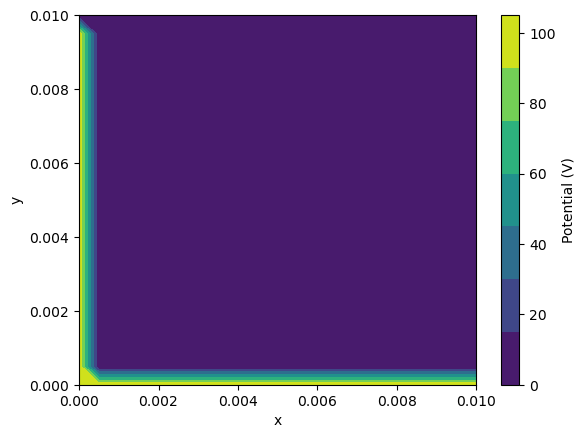

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

def solve(V):
    Vnew = V.copy()
    nx = V.shape[0]
    ny = V.shape[1]
    for y in range(1,ny-1):
        for x in range(1,nx-1):
                Vnew[y,x] = 0.25*(V[y,x-1]+V[y,x+1]+V[y-1,x]+V[y+1,x])
    return Vnew
            
lx = 0.01
ly = 0.01
nx = 20
ny = 20
Vmax = 100.
dx = lx/nx
dy = ly/ny
V = np.zeros(shape=(ny+1,nx+1))


# Initialize arbitrary values
for y in range(1,ny):
    for x in range(1,nx):
        V[y,x] = 10*((x*dx)**2+(y*dy)**2)
        
# Initialize boundary conditions
for y in range(0,ny+1):
    V[y,0] = Vmax
    V[y,nx] = 0.

for x in range(0,nx+1):
    V[0,x] = Vmax
    V[ny,x] = 0.

# construct grid
x = np.arange(0, lx+dx, dx)
y = np.arange(0, ly+dy, dy)
X, Y = np.meshgrid(x, y)


CS = plt.contourf(X, Y, V);
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(CS, label="Potential (V)", ticks=[0, 20, 40, 60, 80, 100])  
plt.show()


## The iteration
Now, we iterate solving for the potential given the initial map. Below, the number of iterations is fixed, but can easily be set to terminate when a certain percentage error is reached.

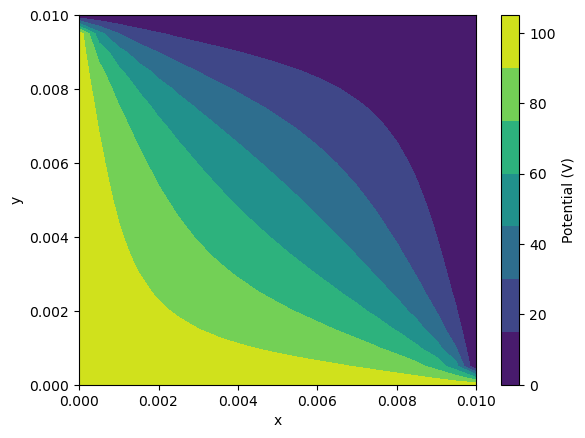

In [12]:
for iter in range(1000):
    V = solve(V)
    
x = np.arange(0, lx+dx, dx)
y = np.arange(0, ly+dy, dy)
X, Y = np.meshgrid(x, y)

CS = plt.contourf(X, Y, V);
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(CS, label="Potential (V)", ticks=[0, 20, 40, 60, 80, 100])  
plt.show()



## Refined Process
Above, we set the number of iterations that should be run before arriving at "the answer", but it may be better to allow the program to judge the convergence to the answer.

Here, we run the iteration until a certain precision is reached.

Converged in 930 iterations


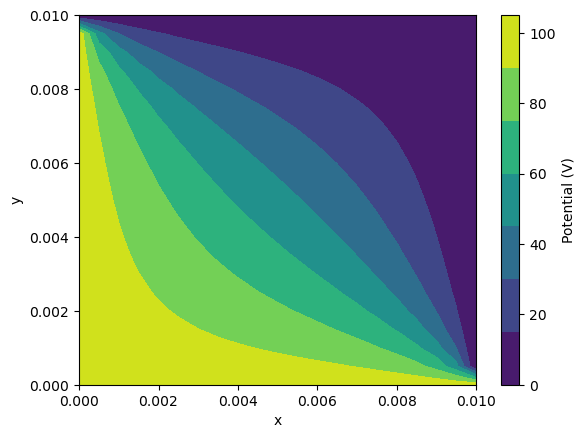

In [16]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

def solve(V, tol=1e-5, max_iter=1000):
    nx, ny = V.shape
    diff = tol + 1  # Initialize with a value larger than tolerance
    iteration = 0
    
    while diff > tol and iteration < max_iter:
        # there maybe something wrong in the next line
        Vprev = V.copy()
        for y in range(1, ny-1):
            for x in range(1, nx-1):
                V[y, x] = 0.25 * (Vprev[y, x-1] + Vprev[y, x+1] + Vprev[y-1, x] + Vprev[y+1, x])
        
        diff = np.max(np.abs(V - Vprev))
        iteration += 1
    print(f'Converged in {iteration} iterations')
    return V

lx = 0.01
ly = 0.01
nx = 20
ny = 20
dx = lx / nx
dy = ly / ny
V = np.zeros((ny+1, nx+1))

# Initialize arbitrary values
for y in range(1, ny):
    for x in range(1, nx):
        V[y, x] = 10 * ((x * dx) ** 2 + (y * dy) ** 2)

# Initialize boundary conditions
V[:, 0] = 100.0  # Left boundary
V[:, nx] = 0.0   # Right boundary
V[0, :] = 100.    # Bottom boundary
V[ny, :] = 0.0   # Top boundary

# Solve for steady-state potential
V = solve(V)

x = np.arange(0, lx + dx, dx)
y = np.arange(0, ly + dy, dy)
X, Y = np.meshgrid(x, y)

 # Using a perceptually uniform colormap
CS = plt.contourf(X, Y, V, cmap="viridis") 
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(CS, label="Potential (V)", ticks=np.linspace(0, 100, 6))  # Custom ticks
plt.show()


The contour map might not be the best way to visualize the potential. A surface plot or wireframes are viable alternatives.

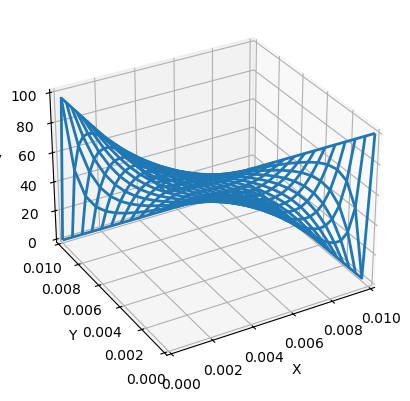

In [20]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot, cm
import matplotlib


fig = pyplot.figure()
ax = fig.add_subplot(111, projection='3d')  # This is the line you need to change

ax.view_init(30, -120)

ax.set_xlim(0, 0.01)
ax.set_ylim(0, 0.01)
ax.set_zlim(0, Vmax)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('V')

# I assume X, Y, and V are defined somewhere before in your code.
#ax.plot_surface(X, Y, V, cmap=cm.coolwarm, linewidth=0, antialiased=True);
ax.plot_wireframe(X, Y, V, linewidth=2, antialiased=True);

pyplot.show()  


# Another Example, now using SOR
Successive Over-relaxation is a method used to increase convergence. It introduces a relaxation parameter $\omega$ that allows new values to be weighted averages of the old and newly computed values. In essence, this extrapolates the solution in a way the speeds up convergence. 

The parameter $\omega$ should vary between 1 and 2 depending on grid size. The theoretical optimal value is $$\omega = \frac{2}{1+\pi/n}$$

Converged in 104 iterations


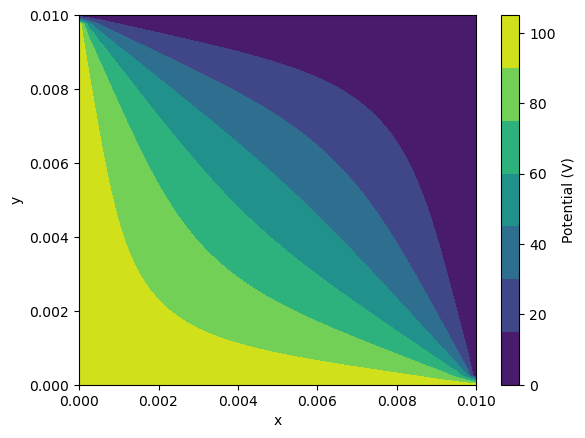

In [28]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def solve(V, tol=1e-5, max_iter=1000, omega=1.5):
    nx, ny = V.shape
    # theoretical omega for grid size
    omega = 2/(1+np.pi/min(nx,ny))
    diff = tol + 1  # Initialize with a value larger than tolerance
    iteration = 0
    
    while diff > tol and iteration < max_iter:
        diff = 0.0
        for y in range(1, ny-1):
            for x in range(1, nx-1):
                V_old = V[y, x]  # Store old value for comparison
                V[y, x] = (1 - omega) * V[y, x] + omega * 0.25 * (V[y, x-1] + V[y, x+1] +V[y-1, x] + V[y+1, x])
                diff = max(diff, abs(V[y, x] - V_old))  # Track max change
        
        iteration += 1
    
    print(f'Converged in {iteration} iterations')
    return V

lx, ly = 0.01, 0.01
nx, ny = 40, 40
dx, dy = lx / nx, ly / ny
V = np.zeros((ny+1, nx+1))

# Initialize arbitrary values
for y in range(1, ny):
    for x in range(1, nx):
        V[y, x] = 10 * ((x * dx) ** 2 + (y * dy) ** 2)

# Initialize boundary conditions
V[:, 0] = 100.0  # Left boundary
V[:, nx] = 0.0   # Right boundary
V[0, :] = 100.0    # Bottom boundary
V[ny, :] = 0.0   # Top boundary

# Solve for steady-state potential
V = solve(V)

x = np.arange(0, lx + dx, dx)
y = np.arange(0, ly + dy, dy)
X, Y = np.meshgrid(x, y)

CS = plt.contourf(X, Y, V, cmap="viridis")
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(CS, label="Potential (V)", ticks=np.linspace(0, 100, 6))
plt.show()

# Poisson’s equation 

Laplace’s equation holds for charge free regions. If there is a charge distribution inside the region we must use Poisson’s equation: 
$$\nabla^2 V = -\frac{\rho}{\epsilon_0}.$$

Let's consider a square of linear dimension $L=25$ cm. We can then define our charge distribution to be some arbitrary function or discrete values.




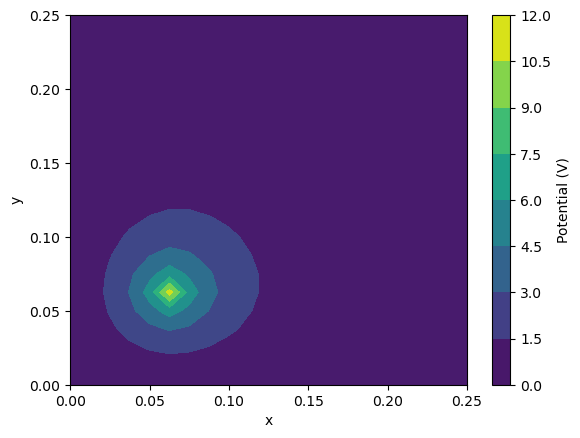

In [34]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
import math

epsilon = 8.85e-12

def solve(V, rho, dx, dy):
    Vnew = V.copy()
    nx, ny = V.shape
    for y in range(1, ny-1):
        for x in range(1, nx-1):
            Vnew[y, x] = 0.25 * (V[y, x-1] + V[y, x+1] + V[y-1, x] + V[y+1, x] + rho[y,x] * dx * dy/epsilon)
    return Vnew

lx = 0.25
ly = 0.25
nx = 20
ny = 20
dx = lx / nx
dy = ly / ny
V = np.zeros((ny+1, nx+1))
# Define charge density (example: point charge at the center)
rho = np.zeros((ny+1, nx+1))
center_x, center_y = nx//4, ny//4
rho[center_y, center_x] = 1e-3  # Arbitrary charge density value

# Initialize arbitrary values
for y in range(1, ny):
    for x in range(1, nx):
        V[y, x] = 100 * ((x * dx) ** 2 + (y * dy) ** 2)

# Initialize boundary conditions
V[:, 0] = 10.0  # Left boundary
V[:, nx] = 10.0  # Right boundary
V[0, :] = 10.0  # Bottom boundary
V[ny, :] = 10.0  # Top boundary

x = np.linspace(0, lx, nx+1)
y = np.linspace(0, ly, ny+1)
X, Y = np.meshgrid(x, y)

fig, ax = plt.subplots()
ax.set_xlim(0, lx)
ax.set_ylim(0, ly)
cont = ax.contourf(X, Y, V, cmap="viridis")
plt.xlabel("x")
plt.ylabel("y")
plt.colorbar(cont, label="Potential (V)")

def evolve(i):
    global V, cont
    V = solve(V, rho, dx, dy)
    for artist in cont.get_children():
        artist.remove()  # Clear previous contours
    cont = ax.contourf(X, Y, V, cmap="viridis")
    return cont.get_children()

anim = animation.FuncAnimation(fig, evolve, frames=100, interval=10, blit=False)
HTML(anim.to_jshtml())


## Using SOR on the Poisson equation
Now, let's see what happens to the convergence when we implement SOR method.

Converged in 208 iterations


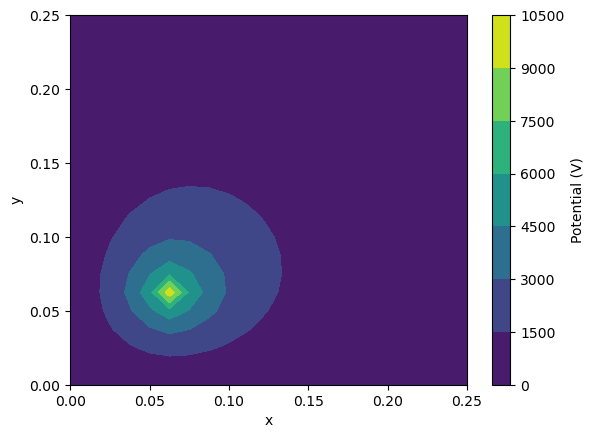

In [35]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

epsilon_0=8.85e-12
def solve(V, rho, dx, tol=1e-5, max_iter=1000, omega=1.5):
    nx, ny = V.shape
    diff = tol + 1  # Initialize with a value larger than tolerance
    iteration = 0
    
    while diff > tol and iteration < max_iter:
        diff = 0.0
        for y in range(1, ny-1):
            for x in range(1, nx-1):
                V_old = V[y, x]  # Store old value for comparison
                V[y, x] = (1 - omega) * V[y, x] + omega * 0.25 * (
                    V[y, x-1] + V[y, x+1] +
                    V[y-1, x] + V[y+1, x] + (rho[y, x] * dx**2 / epsilon_0) )
                diff = max(diff, abs(V[y, x] - V_old))  # Track max change
        
        iteration += 1
    
    print(f'Converged in {iteration} iterations')
    return V

lx, ly = 0.25, 0.25
nx, ny = 20, 20
dx, dy = lx / nx, ly / ny
V = np.zeros((ny+1, nx+1))

# Define charge density 
rho = np.zeros((ny+1, nx+1))
charge_x, charge_y = nx//4, ny//4
rho[charge_y, charge_x] = 1e-3  # Arbitrary charge density value

# Initialize boundary conditions
V[:, 0] = 100.0  # Left boundary
V[:, nx] = 0.0   # Right boundary
V[0, :] = 0.0    # Bottom boundary
V[ny, :] = 0.0   # Top boundary

# Solve for potential with Poisson's equation
V = solve(V, rho, dx)

x = np.arange(0, lx + dx, dx)
y = np.arange(0, ly + dy, dy)
X, Y = np.meshgrid(x, y)

CS = plt.contourf(X, Y, V, cmap="viridis")
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(CS, label="Potential (V)")
plt.show()


In [8]:
import numpy as np

A = np.array([[1, 2], [3, 4]])
B = A+0  # No new copy, B and A reference the same object
B[0, 0] = 99  # Modify B

print(A)  # A also changes!

[[1 2]
 [3 4]]


# Solving Laplace's/Poisson's equation using Linear algebra
We can transform our scalar potential system into a linear system of the form $Au=b$, where $A$ is the Laplacian stencil created from the coefficients of the discrete Laplace's equation, $b$ is a matrix containing boundary conditions and source information, and $u$ is the solution matrix. For large grids, the process of solving can become cumbersome. It is best practice to make $A$ a sparse matrix.

Below is some code that constructs the Laplace stencil $A$ and the boundary/source matrix $b$.

In [38]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla

def construct_poisson_matrix(n):
    """
    Constructs the sparse matrix A for the Poisson equation.
    """
    N = n * n  # Total number of unknowns
    main_diag = -4 * np.ones(N)
    side_diag = np.ones(N-1)
    side_diag[np.arange(1, N) % n == 0] = 0  # Avoid connections across rows
    up_down_diag = np.ones(N-n)

    A = sp.diags([main_diag, side_diag, side_diag, up_down_diag, up_down_diag],
                 [0, -1, 1, -n, n], format="csr")
    return A

A = construct_poisson_matrix(8)
print(A.toarray())

[[-4.  1.  0. ...  0.  0.  0.]
 [ 1. -4.  1. ...  0.  0.  0.]
 [ 0.  1. -4. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -4.  1.  0.]
 [ 0.  0.  0. ...  1. -4.  1.]
 [ 0.  0.  0. ...  0.  1. -4.]]


In [40]:
def construct_rhs(n, f, boundary_conditions, h):
    """
    Constructs the right-hand side vector b including source term and boundary conditions.
    """
    b = np.zeros(n * n)
    x_vals = np.linspace(0, 1, n+2)
    y_vals = np.linspace(0, 1, n+2)

    F = np.array([[f(x, y) for x in x_vals[1:-1]] for y in y_vals[1:-1]])
    b -= (h**2) * F.flatten()

    # Apply boundary conditions
    for i in range(n):
        for j in range(n):
            idx = i * n + j
            if i == 0: b[idx] -= boundary_conditions['bottom'][j] / h**2
            if i == n-1: b[idx] -= boundary_conditions['top'][j] / h**2
            if j == 0: b[idx] -= boundary_conditions['left'][i] / h**2
            if j == n-1: b[idx] -= boundary_conditions['right'][i] / h**2

    return b

n = 20
h = 1 / (n + 1)
boundary_conditions = {
    'left': np.zeros(n+2),
    'right': np.zeros(n+2),
    'top': np.zeros(n+2),
    'bottom': np.zeros(n+2),
}

#Charge distribution
def f(x, y):
    return np.exp(-((x - 0.4)**2 + (y - 0.5)**2) * 100) - np.exp(-((x - 0.6)**2 + (y - 0.5)**2) * 100)

A = construct_poisson_matrix(n)
b = construct_rhs(n, f, boundary_conditions, h)
print(b)

[-1.18864681e-17 -2.71687427e-16 -3.94572766e-15 -3.64103123e-14
 -2.13478371e-13 -7.95178806e-13 -1.88025188e-12 -2.80739327e-12
 -2.55063694e-12 -1.00919744e-12  1.00919744e-12  2.55063694e-12
  2.80739327e-12  1.88025188e-12  7.95178806e-13  2.13478371e-13
  3.64103123e-14  3.94572766e-15  2.71687427e-16  1.18864681e-17
 -7.04179482e-16 -1.60953372e-14 -2.33753243e-13 -2.15702382e-12
 -1.26469097e-11 -4.71080725e-11 -1.11390094e-10 -1.66315908e-10
 -1.51105121e-10 -5.97869887e-11  5.97869887e-11  1.51105121e-10
  1.66315908e-10  1.11390094e-10  4.71080725e-11  1.26469097e-11
  2.15702382e-12  2.33753243e-13  1.60953372e-14  7.04179482e-16
 -2.65066569e-14 -6.05859146e-13 -8.79891727e-12 -8.11944850e-11
 -4.76053768e-10 -1.77323757e-09 -4.19293528e-09 -6.26044756e-09
 -5.68788456e-09 -2.25049613e-09  2.25049613e-09  5.68788456e-09
  6.26044756e-09  4.19293528e-09  1.77323757e-09  4.76053768e-10
  8.11944850e-11  8.79891727e-12  6.05859146e-13  2.65066569e-14
 -6.33968380e-13 -1.44905

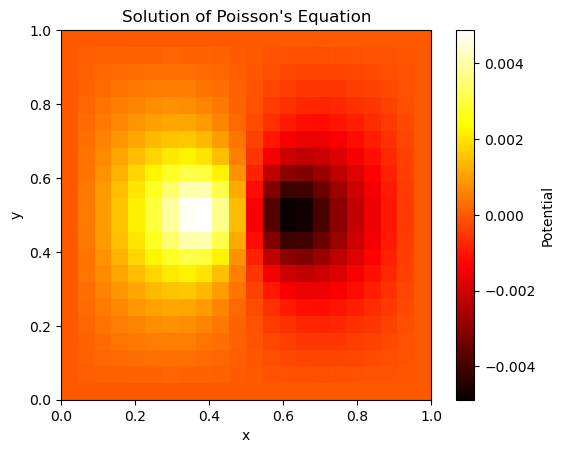

In [42]:
# solve u = A\b
u = spla.spsolve(A,b)
# Solution manipulation

# Reshape the solution into a 2D grid
u_grid = np.zeros((n+2, n+2))  # Include boundary points
u_grid[1:-1, 1:-1] = u.reshape((n, n))

# Set boundary conditions in the solution grid
u_grid[0, :] = boundary_conditions['bottom']
u_grid[-1, :] = boundary_conditions['top']
u_grid[:, 0] = boundary_conditions['left']
u_grid[:, -1] = boundary_conditions['right']

# Display the solution
plt.imshow(u_grid, cmap='hot', origin='lower', extent=[0,1,0,1])
plt.colorbar(label='Potential')
plt.title("Solution of Poisson's Equation")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

## Another attempt
Below is another attempt at implementing some linear algebra solving techniques.

In [ ]:
import numpy as np
import scipy.sparse as sp
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

epsilon_0=8.85e-12
def poisson_solver(nx, ny, lx=1.0, ly=1.0, rho_func=None,):
    dx = lx / (nx - 1)
    dy = ly / (ny - 1)
    N = nx * ny  # Total number of grid points
    
    # Construct the sparse Laplacian matrix A
    A = sp.lil_matrix((N, N))
    b = np.zeros(N)
    
    for j in range(ny):
        for i in range(nx):
            idx = j * nx + i  # Map 2D index to 1D
            
            if i == 0 or i == nx - 1 or j == 0 or j == ny - 1:
                # Boundary conditions: V = 0 (Dirichlet BCs)
                A[idx, idx] = 1
                b[idx] = 0
            else:
                # Poisson finite difference stencil
                A[idx, idx] = -4  # Center
                A[idx, idx + 1] = 1  # Right neighbor
                A[idx, idx - 1] = 1  # Left neighbor
                A[idx, idx + nx] = 1  # Top neighbor
                A[idx, idx - nx] = 1  # Bottom neighbor
                
                # Source term (charge density)
                if rho_func:
                    x = i * dx
                    y = j * dy
                    b[idx] = (rho_func(x, y) * dx**2) / epsilon_0

    # Convert to CSR format for efficient solving
    A = A.tocsr()
    
    # Solve the linear system A * V = b
    V = spla.spsolve(A, b)
    
    # Reshape solution back to 2D grid
    V = V.reshape((ny, nx))
    return V, dx, dy

# Define charge density function (Example: Single charge at center)
def rho_example(x, y):
    return 1e-9 if (0.5 <= x <= 0.6 and 0.5 <= y <= 0.6) else 0
#def rho_example(x, y, x_line=0.5, sigma=1e-9, tol=0.02):
 #   return sigma if abs(x - x_line) < tol else 0

# Solve for potential
nx, ny = 5, 5  # Grid resolution
V, dx, dy = poisson_solver(nx, ny, lx=1.0, ly=1.0, rho_func=rho_example)

# Plot results
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, V, cmap="viridis")
plt.colorbar(label="Potential (V)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Solution to Poisson's Equation")
plt.show()

In [ ]:
def rho_example(x, y, q=1e-9, d=0.2):
    center_x, center_y = 0.5, 0.5  # Center of the domain
    
    # Quadrupole configuration
    charge_positions = [
        (center_x - d, center_y - d, q),  # Positive charge (-d, -d)
        (center_x + d, center_y - d, -q), # Negative charge (+d, -d)
        (center_x - d, center_y + d, -q), # Negative charge (-d, +d)
        (center_x + d, center_y + d, q)   # Positive charge (+d, +d)
    ]
    
    rho = 0
    for cx, cy, charge in charge_positions:
        if np.sqrt((x - cx)**2 + (y - cy)**2) < d/4:  # Small spread for point charges
            rho += charge
    return rho

# More on SOR

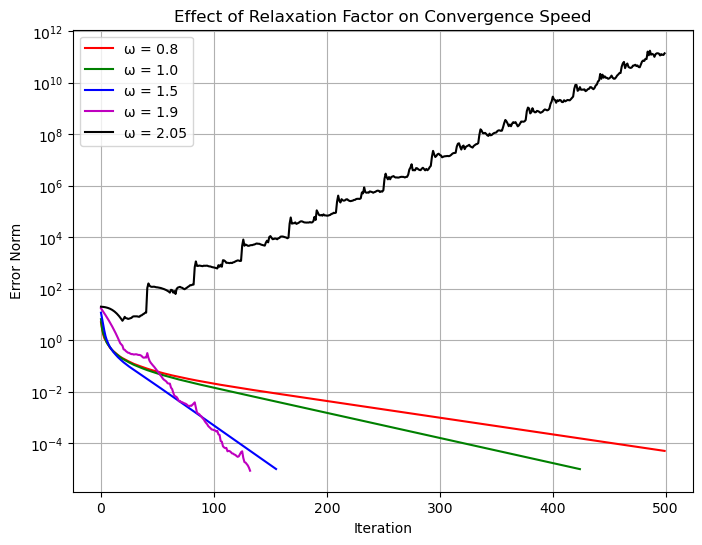

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def sor_solver(n, omega, max_iter=500, tol=1e-5):
    """
    Solves Laplace's equation on an n x n grid using SOR.

    Parameters:
        n: int - Grid size (excluding boundaries)
        omega: float - Relaxation factor
        max_iter: int - Maximum number of iterations
        tol: float - Convergence tolerance

    Returns:
        u: 2D array - Solution grid
        errors: list - List of error norms over iterations
    """
    h = 1.0 / (n + 1)
    u = np.zeros((n+2, n+2))  # Initialize solution grid (includes boundary)
    
    # Set boundary conditions
    u[-1, :] = 1  # Top boundary = 1, others are 0
    
    errors = []
    
    for it in range(max_iter):
        u_old = u.copy()
        
        # Gauss-Seidel with relaxation
        for i in range(1, n+1):
            for j in range(1, n+1):
                u[i, j] = (1 - omega) * u[i, j] + omega * 0.25 * (
                    u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1]
                )
        
        # Compute error as the norm of the difference
        error = np.linalg.norm(u - u_old, ord=np.inf)
        errors.append(error)
        
        if error < tol:
            break
    
    return u, errors

# Define parameters
n = 20  # Grid size
omega_values = [0.8, 1.0, 1.5, 1.9, 2.05]  # Different relaxation factors
colors = ['r', 'g', 'b', 'm', 'k']

# Solve for each omega and store error data
plt.figure(figsize=(8,6))
for omega, color in zip(omega_values, colors):
    _, errors = sor_solver(n, omega)
    plt.plot(errors, label=f'ω = {omega}', color=color)

plt.yscale('log')
plt.xlabel("Iteration")
plt.ylabel("Error Norm")
plt.title("Effect of Relaxation Factor on Convergence Speed")
plt.legend()
plt.grid(True)
plt.show()


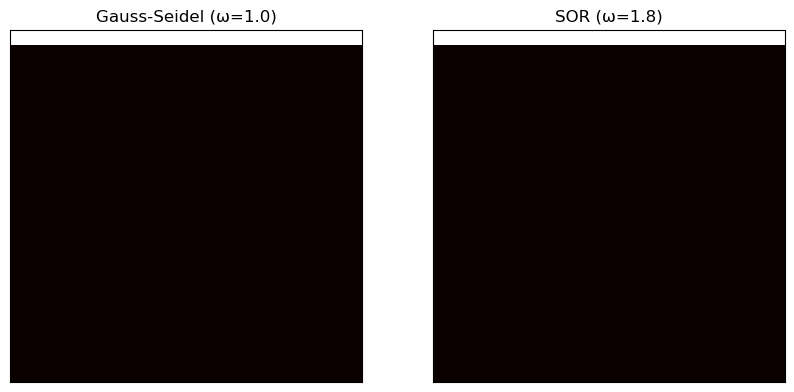

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML

def sor_solver_animation(n, omega, max_iter=100):
    """
    Solves Laplace's equation using SOR and stores intermediate frames for animation.

    Parameters:
        n: int - Grid size (excluding boundaries)
        omega: float - Relaxation factor
        max_iter: int - Maximum number of iterations

    Returns:
        frames: list of 2D numpy arrays - Intermediate steps of solution.
    """
    u = np.zeros((n+2, n+2))  # Initialize grid (includes boundary)

    # Set boundary conditions
    u[-1, :] = 1  # Top boundary = 1, others = 0
    
    frames = [u.copy()]  # Store first frame
    
    for _ in range(max_iter):
        u_old = u.copy()
        
        # Apply SOR updates
        for i in range(1, n+1):
            for j in range(1, n+1):
                u[i, j] = (1 - omega) * u[i, j] + omega * 0.25 * (
                    u[i+1, j] + u[i-1, j] + u[i, j+1] + u[i, j-1]
                )
        
        frames.append(u.copy())  # Store frame for animation
        
        # Stop early if converged
        if np.linalg.norm(u - u_old, ord=np.inf) < 1e-4:
            break

    return frames

# Define grid size and parameters
n = 20
max_iter = 50  # Limit animation length

# Solve using Gauss-Seidel (ω = 1) and SOR (ω = 1.8)
frames_gs = sor_solver_animation(n, omega=1.0, max_iter=max_iter)  # Gauss-Seidel
frames_sor = sor_solver_animation(n, omega=1.8, max_iter=max_iter)  # SOR

# Set up figure
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
titles = ["Gauss-Seidel (ω=1.0)", "SOR (ω=1.8)"]
ims = []

# Animation update function
def update(frame):
    for ax, frames, title in zip(axes, [frames_gs, frames_sor], titles):
        ax.clear()
        ax.set_title(title)
        ax.imshow(frames[frame], cmap="hot", origin="lower", extent=[0, 1, 0, 1])
        ax.set_xticks([])
        ax.set_yticks([])

# Create animation
anim = animation.FuncAnimation(fig, update, frames=len(frames_sor), interval=100)

HTML(anim.to_jshtml())
